# **Project Title**
## Data Analysis on a Merged Dataset After Cleaning

### **Author:**
- Bahar Almasi

### **Submission Date:**
- January 21, 2025

---

### **Executive Summary:**

This project involves data cleaning and analysis of a merged dataset, including energy, GDP, and journal contribution data. The aim is to explore the relationships between energy supply, GDP, and scientific contributions, with a focus on the top 15 countries by rank. Various data manipulation tasks, including joining datasets and calculating new columns, are performed to extract key insights. Visualizations and correlations are presented to support findings and recommendations.


In [293]:
import numpy as np

import pandas as pd

import matplotlib.pyplot as plt 

import seaborn as sns

# Question1

#### a) Read the energy data frame the file Energy Indicators.xls, which is a list of indicators of [energy supply and renewable electricity production] from the [United Nations] (http://unstats.un.org/unsd/environment/excel_file_tables/2013/Energy%20Indicators.xls) for the year 2013, and should be put into a Data Frame with the variable name of energy. Keep in mind that this is an Excel file, and not a comma separated values file. Also, make sure to exclude the footer and header information from the data file. The first two columns are unnecessary, so you should get rid of them, and you should change the column labels so that the columns are: 
 
#### ['Country', 'Energy Supply', 'Energy Supply per Capita', '% Renewable’]


In [297]:

# Read the Excel file, skipping the unnecessary rows (header and footer) 
energy = pd.read_excel("EnergyIndicators.xls", skipfooter=38, header=17)

#drop the first two unnecessary columns:
energy= energy.drop(energy.columns[[0,1]],axis =1)


# Rename the columns to the required names
energy.columns = ['Country', 'Energy Supply', 'Energy Supply per Capita', '% Renewable']

# Display the first few rows of the dataframe
print(energy.head())


          Country Energy Supply Energy Supply per Capita  % Renewable
0     Afghanistan           321                       10    78.669280
1         Albania           102                       35   100.000000
2         Algeria          1959                       51     0.551010
3  American Samoa           ...                      ...     0.641026
4         Andorra             9                      121    88.695650


### b) Convert variable "Energy Supply" to gigajoules (there are 1,000,000 gigajoules in a petajoule). For all countries which have missing data (e.g. data with "...") make sure this is reflected as NA values. 
 


In [300]:
energy['Energy Supply'] = energy['Energy Supply'].replace('...', np.nan)


energy['Energy Supply'] = energy['Energy Supply'] * 1e6

print(energy.head(15))


                Country  Energy Supply Energy Supply per Capita  % Renewable
0           Afghanistan   3.210000e+08                       10    78.669280
1               Albania   1.020000e+08                       35   100.000000
2               Algeria   1.959000e+09                       51     0.551010
3        American Samoa            NaN                      ...     0.641026
4               Andorra   9.000000e+06                      121    88.695650
5                Angola   6.420000e+08                       27    70.909090
6              Anguilla   2.000000e+06                      136     0.000000
7   Antigua and Barbuda   8.000000e+06                       84     0.000000
8             Argentina   3.378000e+09                       79    24.064520
9               Armenia   1.430000e+08                       48    28.236060
10                Aruba   1.200000e+07                      120    14.870690
11           Australia1   5.386000e+09                      231    11.810810

/var/folders/43/0xfmd9ss7d73pj4cwk4r4m180000gn/T/ipykernel_75325/2699066318.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  energy['Energy Supply'] = energy['Energy Supply'].replace('...', np.nan)


### c) Rename the following list of countries. 

###### "United States of America" to "United States",
###### "United Kingdom of Great Britain and Northern Ireland" to "United Kingdom",
###### "China, Hong Kong Special Administrative Region" to "Hong Kong"
 
###### There are also several countries with parenthesis in their name. Be sure to remove these,'Bolivia (Plurinational State of)'should be 'Bolivia'`.


In [303]:
#Before rename the name of countries we need  rip of all numbers in the countries names, otherwise some \ contries won't be update.
energy['Country'] = energy['Country'].str.replace(r'\d+', '', regex=True).str.strip()


# Removing parentheses and text inside them:the method,str.strip() is used to remove leading and trailing whitespace from a string. 
energy['Country'] = energy['Country'].str.replace(r'\(.*\)',"",regex=True).str.strip()


# Renaming specific countries
energy['Country'] = energy['Country'].replace({
    'Republic of Korea': 'South Korea',
    'United States of America': 'United States',
    'United Kingdom of Great Britain and Northern Ireland': 'United Kingdom',
    'China, Hong Kong Special Administrative Region': 'Hong Kong'
})


# Display the updated dataframe to check the changes
print(energy['Country'].head())


0       Afghanistan
1           Albania
2           Algeria
3    American Samoa
4           Andorra
Name: Country, dtype: object


### d) Next, load the GDP data from the file world_bank.csv, which is a csv containing countries' GDP from 1960 to 2015 from [World Bank] (http://data.worldbank.org/indicator/NY.GDP.MKTP.CD). Call this Data Frame GDP. Make sure to skip the header, and rename the following list of countries: 
### "Korea, Rep." to "South Korea", 
### "Iran, Islamic Rep." to "Iran",
### "Hong Kong SAR, China" to "Hong Kong"


In [306]:
GDP = pd.read_csv('world_bank.csv', skiprows=4)


GDP=GDP.rename(columns={'Country Name':"Country"})


GDP["Country"] = GDP["Country"].replace({
    "Korea, Rep." : "South Korea",
    "Iran, Islamic Rep." : "Iran",
    "Hong Kong SAR, China" : "Hong Kong"
    
})



GDP['Country'] = GDP['Country'].str.replace(r'\(.*\)',"",regex=True).str.strip()



### e) Finally, load the [Sciamgo Journal and Country Rank data for Energy Engineering and Power Technology] (http://www.scimagojr.com/countryrank.php?category=2102) from the file scimagojr-3.xlsx, which ranks countries based on their journal contributions in the aforementioned area. Call this Data Frame ScimEn. 
 

In [309]:
ScimEn = pd.read_excel("scimagojr-3.xlsx")

ScimEn['Country'] = ScimEn['Country'].str.replace(r'\(.*\)',"",regex=True).str.strip()
print(ScimEn)

     Rank             Country  Documents  Citable documents  Citations  \
0       1               China     127050             126767     597237   
1       2       United States      96661              94747     792274   
2       3               Japan      30504              30287     223024   
3       4      United Kingdom      20944              20357     206091   
4       5  Russian Federation      18534              18301      34266   
..    ...                 ...        ...                ...        ...   
186   187              Guyana          1                  1          0   
187   188    Christmas Island          1                  1          0   
188   189             Reunion          1                  1          2   
189   190         Saint Lucia          1                  1          0   
190   191          Mauritania          1                  1          1   

     Self-citations  Citations per document  H index  
0            411683                    4.70      138  
1

### f) Join the three datasets: GDP, Energy, and ScimEn into a new dataset (using the intersection of country names). Use only the last 10 years (2006-2015) of GDP data and only the top 15 countries by Scimagojr 'Rank' (Rank 1 through 15). The index of this Data Frame should be the name of the country, and the columns should be ['Rank', 'Documents', 'Citable documents', 'Citations', 'Self-citations', 'Citations per document', 'H index', 'Energy Supply', 'Energy Supply per Capita', '% Renewable', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015']. You should finally get a Data Frame with 20 columns and 15 entries.

In [312]:
GDP
ScimEn
energy

GDP_last_10_years = GDP[['Country','2006','2007','2008','2009','2010','2011','2012','2013','2014','2015']]

ScimEn_top_15 = ScimEn[ScimEn['Rank']<= 15]

merged_data_set = pd.merge(pd.merge(ScimEn_top_15, GDP, how ='inner', on = 'Country'), energy, how = 'left', on = 'Country')


merged_data_set = merged_data_set.sort_values(by ='Rank', ascending = True)


merged_data_set=merged_data_set[['Country','Rank', 'Documents', 'Citable documents',
                                  'Citations', 'Self-citations', 'Citations per document', 
                                  'H index', 'Energy Supply', 'Energy Supply per Capita', 
                                  '% Renewable', '2006', '2007', '2008', '2009', '2010','2011', '2012', '2013', '2014', '2015']] 

merged_data_set = merged_data_set.set_index('Country')

merged_data_set

,Rank,Documents,Citable documents,Citations,Self-citations,Citations per document,H index,Energy Supply,Energy Supply per Capita,% Renewable,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
Country,,,,,,,,,,,,,,,,,,,,
China,1,127050,126767,597237,411683,4.70,138,1.271910e+11,93,19.754910,3.992331e+12,4.559041e+12,4.997775e+12,5.459247e+12,6.039659e+12,6.612490e+12,7.124978e+12,7.672448e+12,8.230121e+12,8.797999e+12
United States,2,96661,94747,792274,265436,8.20,230,9.083800e+10,286,11.570980,1.479230e+13,1.505540e+13,1.501149e+13,1.459484e+13,1.496437e+13,1.520402e+13,1.554216e+13,1.577367e+13,1.615662e+13,1.654857e+13
Japan,3,30504,30287,223024,61554,7.31,134,1.898400e+10,149,10.232820,5.496542e+12,5.617036e+12,5.558527e+12,5.251308e+12,5.498718e+12,5.473738e+12,5.569102e+12,5.644659e+12,5.642884e+12,5.669563e+12
United Kingdom,4,20944,20357,206091,37874,9.84,139,7.920000e+09,124,10.600470,2.419631e+12,2.482203e+12,2.470614e+12,2.367048e+12,2.403504e+12,2.450911e+12,2.479809e+12,2.533370e+12,2.605643e+12,2.666333e+12
Russian Federation,5,18534,18301,34266,12422,1.85,57,3.070900e+10,214,17.288680,1.385793e+12,1.504071e+12,1.583004e+12,1.459199e+12,1.524917e+12,1.589943e+12,1.645876e+12,1.666934e+12,1.678709e+12,1.616149e+12
Canada,6,17899,17620,215003,40930,12.01,149,1.043100e+10,296,61.945430,1.564469e+12,1.596740e+12,1.612713e+12,1.565145e+12,1.613406e+12,1.664087e+12,1.693133e+12,1.730688e+12,1.773486e+12,1.792609e+12
Germany,7,17027,16831,140566,27426,8.26,126,1.326100e+10,165,17.901530,3.332891e+12,3.441561e+12,3.478809e+12,3.283340e+12,3.417298e+12,3.542371e+12,3.556724e+12,3.567317e+12,3.624386e+12,3.685556e+12
India,8,15005,14841,128763,37209,8.58,115,3.319500e+10,26,14.969080,1.265894e+12,1.374865e+12,1.428361e+12,1.549483e+12,1.708459e+12,1.821872e+12,1.924235e+12,2.051982e+12,2.200617e+12,2.367206e+12
France,9,13153,12973,130632,28601,9.93,114,1.059700e+10,166,17.020280,2.607840e+12,2.669424e+12,2.674637e+12,2.595967e+12,2.646995e+12,2.702032e+12,2.706968e+12,2.722567e+12,2.729632e+12,2.761185e+12


### Q2) What are the top 15 countries for average GDP over the last 10 years? [NB: This function should return a Series named ‘avgGDP’ with 15 countries and their average GDP sorted in descending order.] 



In [315]:
relevant_columns = ['Country', '2006', '2007', '2008', '2009', '2010', 
                    '2011', '2012', '2013', '2014', '2015']
GDP = GDP[relevant_columns]

GDP.iloc[:, 1:] = GDP.iloc[:, 1:].apply(pd.to_numeric, errors='coerce')

GDP['avgGDP'] = GDP.iloc[:, 1:].mean(axis=1)


def is_Country(name):
    aggregate_terms = ['World', 'income', 'members', 'dividend', 'total', 
                       'Asia', 'Union', 'America', 'region', 'area', 
                       'Caribbean', 'Middle East', 'North Africa', 'Euro', 'IBRD']
    return not any(term in name for term in aggregate_terms)


GDP = GDP[GDP['Country'].apply(is_Country)]

top_15_countries = GDP[['Country', 'avgGDP']].sort_values(by='avgGDP', ascending=False).head(15)

avgGDP = top_15_countries.set_index('Country')['avgGDP']
print(avgGDP)

Country
United States         1.536434e+13
China                 6.348609e+12
Japan                 5.542208e+12
Germany               3.493025e+12
France                2.681725e+12
United Kingdom        2.487907e+12
Brazil                2.189794e+12
Italy                 2.120175e+12
India                 1.769297e+12
Canada                1.660647e+12
Russian Federation    1.565459e+12
Spain                 1.418078e+12
Sub-Saharan Africa    1.385465e+12
Sub-Saharan Africa    1.385465e+12
Sub-Saharan Africa    1.384420e+12
Name: avgGDP, dtype: float64


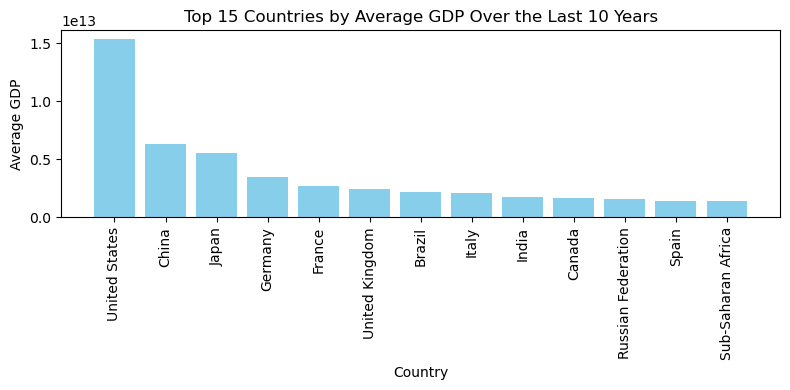

In [317]:
# Plot using matplotlib
plt.figure(figsize=(8, 4))  # Adjust the figure size if needed
plt.bar(avgGDP.index, avgGDP.values, color='skyblue')
plt.xlabel('Country')
plt.ylabel('Average GDP')
plt.title('Top 15 Countries by Average GDP Over the Last 10 Years')
plt.xticks(rotation=90)  # Rotate the x-axis labels for better readability
plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()


### Q3)By how much had the GDP changed over the 10 year span for the country with the 6th largest average GDP? [NB: This function should return a single number.] 



In [320]:
def gdp_change_6th_largest(GDP):
    # Step 1: Select relevant columns and calculate average GDP
    relevant_columns = ['Country', '2006', '2007', '2008', '2009', '2010', 
                        '2011', '2012', '2013', '2014', '2015']
    GDP = GDP[relevant_columns]
    GDP.iloc[:, 1:] = GDP.iloc[:, 1:].apply(pd.to_numeric, errors='coerce')
    GDP['avgGDP'] = GDP.iloc[:, 1:].mean(axis=1)
    
    # Step 2: Filter out non-country rows
    def is_Country(name):
        aggregate_terms = ['World', 'income', 'members', 'dividend', 'total', 
                           'Asia', 'Union', 'America', 'region', 'area', 
                           'Caribbean', 'Middle East', 'North Africa', 'Euro', 'IBRD']
        return not any(term in name for term in aggregate_terms)
    GDP = GDP[GDP['Country'].apply(is_Country)]
    
    # Step 3: Sort by average GDP and find the 6th largest country
    top_15_countries = GDP[['Country', 'avgGDP']].sort_values(by='avgGDP', ascending=False).head(15)
    sixth_country = top_15_countries.iloc[5]['Country']  # Get the country with the 6th largest avgGDP
    
    # Step 4: Calculate the GDP change for the 6th country
    gdp_values = GDP[GDP['Country'] == sixth_country].iloc[0, 1:11]  # Select GDP values (2006–2015)
    gdp_change = gdp_values['2015'] - gdp_values['2006']  # Calculate the difference
    
    return gdp_change

# Example call to the function
gdp_change = gdp_change_6th_largest(GDP)
print(gdp_change)


246702696075.3999


### Q4)What is the mean energy supply per capita? [NB: This function should return a single number.]



In [323]:
merged_data_set['Energy Supply per Capita'] = pd.to_numeric(merged_data_set['Energy Supply per Capita'], errors='coerce')
mean_energy_supply_per_capita = merged_data_set['Energy Supply per Capita'].mean()

print(mean_energy_supply_per_capita)


157.6


### Q5)Which country has the maximum % Renewable and what is the percentage? [NB: This function should return a tuple with the name of the country and the percentage.]



In [326]:
# Find the index of the row with the maximum % Renewable
max_renewable_idx = merged_data_set['% Renewable'].idxmax()

# Retrieve the country and the percentage
country_with_max_renewable = max_renewable_idx  # Since Country is now the index
max_renewable_percentage = merged_data_set.loc[max_renewable_idx, '% Renewable']

# Return the result as a tuple
result = (country_with_max_renewable, max_renewable_percentage)
print(result)


('Brazil', 69.64803)


### Q6)Create a new column that is the ratio of Self-Citations to Total Citations. What is the maximum value for this new column, and which country has the highest ratio? [NB: This function should return a tuple with the name of the country and the ratio.]



In [329]:
# Step 1: Create the new column for the ratio of Self-Citations to Total Citations
merged_data_set['Self-Citations to Citations Ratio'] = merged_data_set['Self-citations'] / merged_data_set['Citations']

# Step 2: Find the maximum value of the ratio
max_ratio = merged_data_set['Self-Citations to Citations Ratio'].max()

# Step 3: Find the country corresponding to the highest ratio
# Since 'Country' is the index, we can directly use the index for lookup
country_with_max_ratio = merged_data_set.loc[merged_data_set['Self-Citations to Citations Ratio'] == max_ratio].index[0]

# Step 4: Return the country and the ratio as a tuple
result = (country_with_max_ratio, max_ratio)

# Print the result
print(result)


('China', 0.6893126179389422)


/var/folders/43/0xfmd9ss7d73pj4cwk4r4m180000gn/T/ipykernel_75325/2728110465.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=merged_data_set.index, y=merged_data_set['Self-Citations to Citations Ratio'], palette='viridis')


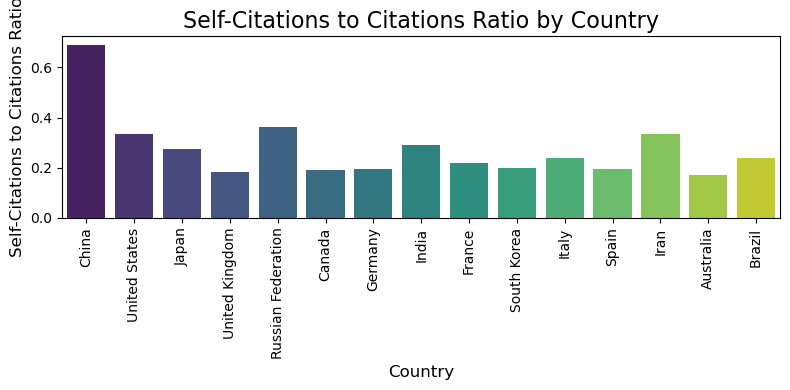

In [331]:
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Create the bar plot for the 'Self-Citations to Citations Ratio'
plt.figure(figsize=(8, 4))  # Set the size of the plot
sns.barplot(x=merged_data_set.index, y=merged_data_set['Self-Citations to Citations Ratio'], palette='viridis')

# Step 2: Customize the plot
plt.title('Self-Citations to Citations Ratio by Country', fontsize=16)
plt.xlabel('Country', fontsize=12)
plt.ylabel('Self-Citations to Citations Ratio', fontsize=12)
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability

# Step 3: Show the plot
plt.tight_layout()  # Adjust the layout to ensure labels fit
plt.show()


### Q7)Create a column that estimates the population using Energy Supply and Energy Supply per capita. What is the third most populous country according to this estimate? [NB: This function should return a single string value.] 



In [334]:
## Create a new column to estimate the population
merged_data_set['Estimated Population'] = merged_data_set['Energy Supply'] / merged_data_set['Energy Supply per Capita']

# Sort the countries based on the estimated population in descending order
sorted_energy = merged_data_set.sort_values(by='Estimated Population', ascending=False)

# Get the third most populous country
third_most_populous_country = sorted_energy.iloc[2]

print(third_most_populous_country)


Rank                                 2.000000e+00
Documents                            9.666100e+04
Citable documents                    9.474700e+04
Citations                            7.922740e+05
Self-citations                       2.654360e+05
Citations per document               8.200000e+00
H index                              2.300000e+02
Energy Supply                        9.083800e+10
Energy Supply per Capita             2.860000e+02
% Renewable                          1.157098e+01
2006                                 1.479230e+13
2007                                 1.505540e+13
2008                                 1.501149e+13
2009                                 1.459484e+13
2010                                 1.496437e+13
2011                                 1.520402e+13
2012                                 1.554216e+13
2013                                 1.577367e+13
2014                                 1.615662e+13
2015                                 1.654857e+13


/var/folders/43/0xfmd9ss7d73pj4cwk4r4m180000gn/T/ipykernel_75325/1845811064.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_10.index, y=top_10['Estimated Population'], palette='viridis')
/var/folders/43/0xfmd9ss7d73pj4cwk4r4m180000gn/T/ipykernel_75325/1845811064.py:18: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


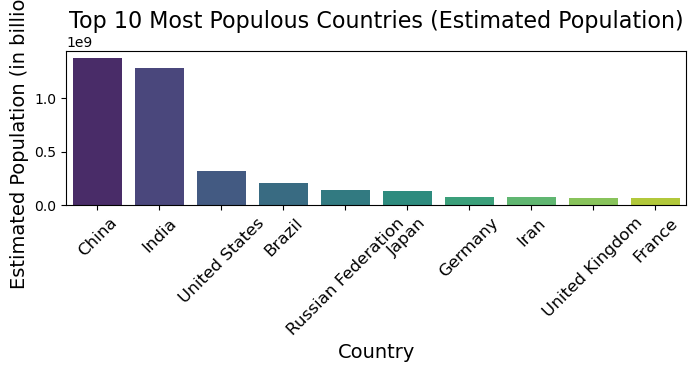

In [336]:


# Sort countries by Estimated Population in descending order
sorted_energy = merged_data_set.sort_values(by='Estimated Population', ascending=False)

# Plot the top 10 most populous countries
top_10 = sorted_energy.head(10)

# Create the bar graph
plt.figure(figsize=(8, 2))
sns.barplot(x=top_10.index, y=top_10['Estimated Population'], palette='viridis')

# Customize the plot
plt.title('Top 10 Most Populous Countries (Estimated Population)', fontsize=16)
plt.xlabel('Country', fontsize=14)
plt.ylabel('Estimated Population (in billions)', fontsize=14)
plt.xticks(rotation=45, fontsize=12)

# Show the graph
plt.tight_layout()
plt.show()


The third most populous country is: United States


/var/folders/43/0xfmd9ss7d73pj4cwk4r4m180000gn/T/ipykernel_75325/1184303573.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=sorted_energy.index, y=sorted_energy['Estimated Population'], palette='Blues_d')


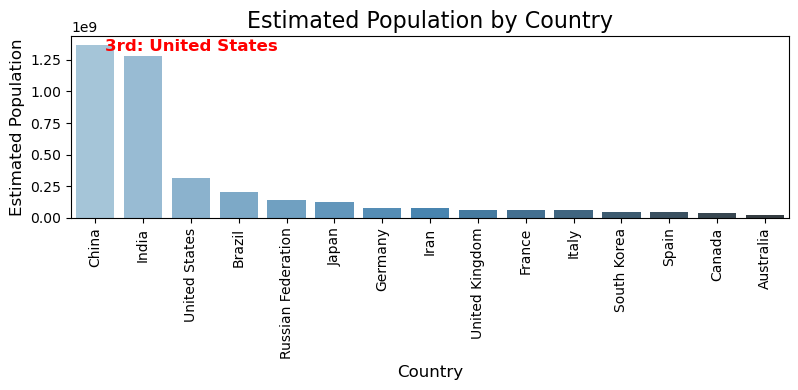

In [338]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming merged_data_set is already available and you have calculated the Estimated Population
merged_data_set['Estimated Population'] = merged_data_set['Energy Supply'] / merged_data_set['Energy Supply per Capita']

# Sort the countries based on the estimated population in descending order
sorted_energy = merged_data_set.sort_values(by='Estimated Population', ascending=False)

# Reset the index to access 'Country' if it's set as the index
sorted_energy_reset = sorted_energy.reset_index()

# Get the third most populous country
third_most_populous_country = sorted_energy_reset.iloc[2]['Country']
print("The third most populous country is:", third_most_populous_country)

# Step 1: Create the bar plot for the 'Estimated Population'
plt.figure(figsize=(8, 4))  # Set the size of the plot
sns.barplot(x=sorted_energy.index, y=sorted_energy['Estimated Population'], palette='Blues_d')

# Step 2: Customize the plot
plt.title('Estimated Population by Country', fontsize=16)
plt.xlabel('Country', fontsize=12)
plt.ylabel('Estimated Population', fontsize=12)
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability

# Step 3: Highlight the third most populous country
third_most_populous_idx = sorted_energy_reset.iloc[2].name
plt.text(third_most_populous_idx, sorted_energy_reset.iloc[2]['Estimated Population'] + 1_000_000_000,
         '3rd: ' + third_most_populous_country, color='red', ha='center', fontsize=12, weight='bold')

# Step 4: Show the plot
plt.tight_layout()  # Adjust the layout to ensure labels fit
plt.show()


### Q8)Create a column that estimates the number of citable documents per person. What is the correlation between the number of citable documents per capita and the energy supply per capita? Use the “.corr()” method, (Pearson's correlation). [NB: This function should return a single number.] Plot to visualize the relationship between Energy Supply per Capita vs. Citable docs per Capita.



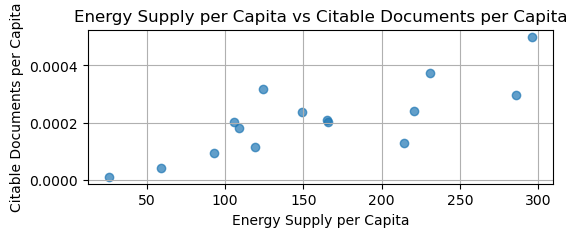

0.7940010435442947

In [341]:
import matplotlib.pyplot as plt
merged_data_set['Citable Docs per Capita'] = merged_data_set['Citable documents'] / merged_data_set['Estimated Population']

corr = merged_data_set['Energy Supply per Capita'].corr(merged_data_set['Citable Docs per Capita'])
plt.figure(figsize=(6, 2))
plt.scatter(merged_data_set['Energy Supply per Capita'],merged_data_set['Citable Docs per Capita'], alpha=0.7)
plt.title('Energy Supply per Capita vs Citable Documents per Capita')
plt.xlabel('Energy Supply per Capita')
plt.ylabel('Citable Documents per Capita')
plt.grid()
plt.show()
corr

### Q9)Create a new column with a 1 if the country's % Renewable value is at or above the median for all countries in the top 15, and a 0 if the country's % Renewable value is below the median. [NB: This function should return a series named “HighRenew” whose index is the country name sorted in ascending order of rank.]



In [344]:
median_renewable = merged_data_set['% Renewable'].median()

merged_data_set['HighRenew'] = (merged_data_set['% Renewable'] >= median_renewable).astype(int)

HighRenew = merged_data_set.sort_values('Rank')['HighRenew']

print(HighRenew)

Country
China                 1
United States         0
Japan                 0
United Kingdom        0
Russian Federation    1
Canada                1
Germany               1
India                 0
France                1
South Korea           0
Italy                 1
Spain                 1
Iran                  0
Australia             0
Brazil                1
Name: HighRenew, dtype: int64


### Q10)Use the following dictionary to group the Countries by Continent, then create a dataframe that displays the sample size (the number of countries in each continent bin), and the sum, mean, and std deviation for the estimated population of each continent. [1 Mark]
 ### ContinentDict  = 
##### {'China':'Asia', 
##### 'United States':'North America', 
##### 'Japan':'Asia', 
##### 'United Kingdom':'Europe', 
##### 'Russian Federation':'Europe', 
##### 'Canada':'North America', 
##### 'Germany':'Europe', 
##### 'India':'Asia',
##### 'France':'Europe', 
##### 'South Korea':'Asia', 
##### 'Italy':'Europe', 
##### 'Spain':'Europe', 
##### 'Iran':'Asia',
##### 'Australia':'Australia', 
##### 'Brazil':'South America'}
#### [NB: This function should return a DataFrame with index named Continent ['Asia', 'Australia', 'Europe', 'North America', 'South America'] and with columns ['size', 'sum', 'mean', 'std'].]

In [347]:

# Fill missing values with 0
df_filled = merged_data_set.fillna({'Estimated Population': 0})

# Define data1 DataFrame
data1 = {
    'Country': ['China', 'United States', 'Japan', 'United Kingdom', 'Russian Federation', 
                'Canada', 'Germany', 'India', 'France', 'South Korea', 'Italy', 'Spain', 
                'Iran', 'Australia', 'Brazil'],
    'Estimated Population': [1.367645e+09, 3.176154e+08, 1.274094e+08, 6.387097e+07,
                             1.435000e+08, 3.523986e+07, 8.036970e+07,
                             1.276731e+09, 6.383735e+07, 4.980543e+07,
                             5.990826e+07, 4.644340e+07, 0.000000e+00, 2.331602e+07, 2.059153e+08]
}

df1 = pd.DataFrame(data1)

# Define Continent mapping
ContinentDict = {
    'China': 'Asia',
    'United States': 'North America',
    'Japan': 'Asia',
    'United Kingdom': 'Europe',
    'Russian Federation': 'Europe',
    'Canada': 'North America',
    'Germany': 'Europe',
    'India': 'Asia',
    'France': 'Europe',
    'South Korea': 'Asia',
    'Italy': 'Europe',
    'Spain': 'Europe',
    'Iran': 'Asia',
    'Australia': 'Australia',
    'Brazil': 'South America'
}

# Map continents to the DataFrame
df1['Continent'] = df1['Country'].map(ContinentDict)

# Group by Continent and calculate statistics
continent_stats = df1.groupby('Continent')['Estimated Population'].agg(
    size='size',
    sum='sum',
    mean='mean',
    std='std'
)

print(continent_stats)


               size           sum          mean           std
Continent                                                    
Asia              5  2.821591e+09  5.643182e+08  6.940702e+08
Australia         1  2.331602e+07  2.331602e+07           NaN
Europe            6  4.579297e+08  7.632161e+07  3.464767e+07
North America     2  3.528553e+08  1.764276e+08  1.996697e+08
South America     1  2.059153e+08  2.059153e+08           NaN


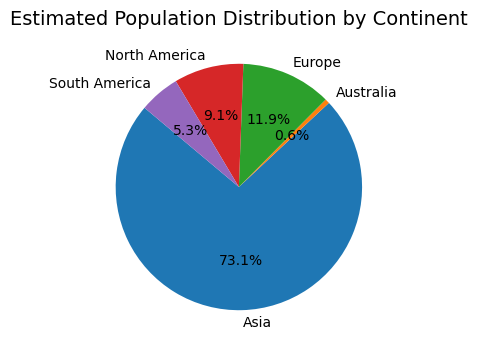

In [349]:
import matplotlib.pyplot as plt

# Extract data for the pie chart
continent_population = continent_stats['sum']
continents = continent_population.index

# Create the pie chart
plt.figure(figsize=(4, 4))
plt.pie(continent_population, labels=continents, autopct='%1.1f%%', startangle=140, colors=plt.cm.tab10.colors)

# Add a title
plt.title('Estimated Population Distribution by Continent', fontsize=14)

# Show the chart
plt.show()


### Q11)Cut % Renewable into 5 bins. Group Top15 by the Continent, as well as these new % Renewable bins. How many countries are in each of these groups? [NB: This function should return a Series with a MultiIndex of ‘Continent’, then the bins for ‘% Renewable’. Do not include groups with no countries.]



In [352]:
import pandas as pd

# Data provided
data = {
    'Country': ['China', 'United States', 'Japan', 'United Kingdom', 'Russian Federation', 
                'Canada', 'Germany', 'India', 'France', 'South Korea', 'Italy', 'Spain', 
                'Iran', 'Australia', 'Brazil'],
    'Estimated Population': [1.367645e+09,3.176154e+08,1.274094e+08,6.387097e+07,
                             1.435000e+08, 3.523986e+07, 8.036970e+07,1.276731e+09,
                             6.383735e+07, 4.980543e+07,5.990826e+07, 4.644340e+07,
                             0.000000e+00, 2.331602e+07, 2.059153e+08],
    '% Renewable': [19.754910, 11.570980, 10.232820, 10.600470, 17.288680, 61.945430, 17.901530, 
                    14.969080, 17.020280, 2.279353, 33.667230, 37.968590,7.707563e+07 , 11.810810, 69.648030],
    'Continent': ['Asia', 'North America', 'Asia', 'Europe', 'Europe', 'North America', 'Europe',
                  'Asia', 'Europe', 'Asia', 'Europe', 'Europe', 'Asia', 'Australia', 'South America']
}

# Create DataFrame
df2 = pd.DataFrame(data)

# Create bins for % Renewable
bins = pd.cut(df2['% Renewable'], 5, labels=["Bin 1", "Bin 2", "Bin 3", "Bin 4", "Bin 5"])

# Add the 'Renewable Bins' column to df2
df2['Renewable Bins'] = bins

# Group by Continent and Renewable Bins, and count the number of countries in each group
grouped = df2.groupby(['Continent', 'Renewable Bins']).size()

# Filter out groups with no countries (if any) and print the result
result = grouped[grouped > 0]
print(result)


Continent      Renewable Bins
Asia           Bin 1             4
               Bin 5             1
Australia      Bin 1             1
Europe         Bin 1             6
North America  Bin 1             2
South America  Bin 1             1
dtype: int64


/var/folders/43/0xfmd9ss7d73pj4cwk4r4m180000gn/T/ipykernel_75325/3606203610.py:28: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = df2.groupby(['Continent', 'Renewable Bins']).size()


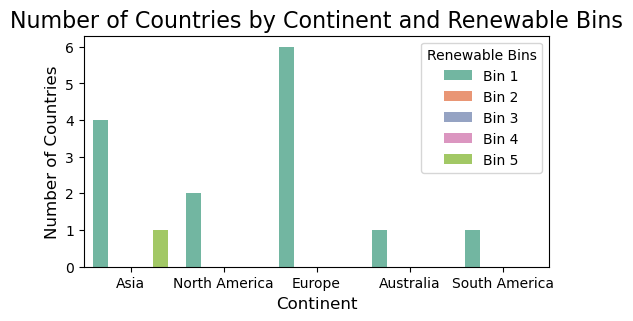

In [354]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot the grouped data
plt.figure(figsize=(6, 3))
sns.countplot(data=df2, x='Continent', hue='Renewable Bins', palette='Set2')

# Add labels and title
plt.title('Number of Countries by Continent and Renewable Bins', fontsize=16)
plt.xlabel('Continent', fontsize=12)
plt.ylabel('Number of Countries', fontsize=12)
plt.legend(title='Renewable Bins', loc='upper right')

# Show the plot
plt.show()


### Q12)Convert the Population Estimate series to a string with thousands separator (using commas). Do not round the results. 


In [357]:
def format_population_with_commas(df):
    # Ensure Population Estimate is in the correct format
    PopEst = df['Estimated Population'].apply(lambda x: f"{x:,.15g}")
    PopEst.index = df['Country']  # Set the index to be the country names
    return PopEst



data = {
    'Country': [ 'China','United States','Japan','United Kingdom','Russian Federation','Canada','Germany','India','France','South Korea'
                ,'Italy','Spain','Iran','Australia','Brazil'],
     'Estimated Population': [1.367645e+09, 3.176154e+08, 1.274094e+08, 6.387097e+07,
                             1.435000e+08, 3.523986e+07, 8.036970e+07,
                             1.276731e+09, 6.383735e+07, 4.980543e+07,
                             5.990826e+07, 4.644340e+07,7.707563e+07,2.331602e+07, 2.059153e+08]           
}

df = pd.DataFrame(data)

PopEst = format_population_with_commas(df)
print(PopEst)




Country
China                 1,367,645,000
United States           317,615,400
Japan                   127,409,400
United Kingdom           63,870,970
Russian Federation      143,500,000
Canada                   35,239,860
Germany                  80,369,700
India                 1,276,731,000
France                   63,837,350
South Korea              49,805,430
Italy                    59,908,260
Spain                    46,443,400
Iran                     77,075,630
Australia                23,316,020
Brazil                  205,915,300
Name: Estimated Population, dtype: object


/var/folders/43/0xfmd9ss7d73pj4cwk4r4m180000gn/T/ipykernel_75325/112488002.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=PopEst.index, y=df['Estimated Population'], palette='viridis')
/var/folders/43/0xfmd9ss7d73pj4cwk4r4m180000gn/T/ipykernel_75325/112488002.py:15: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.text(i, value + 1e7, f"{PopEst[i]}", ha='center', fontsize=10, color='black')


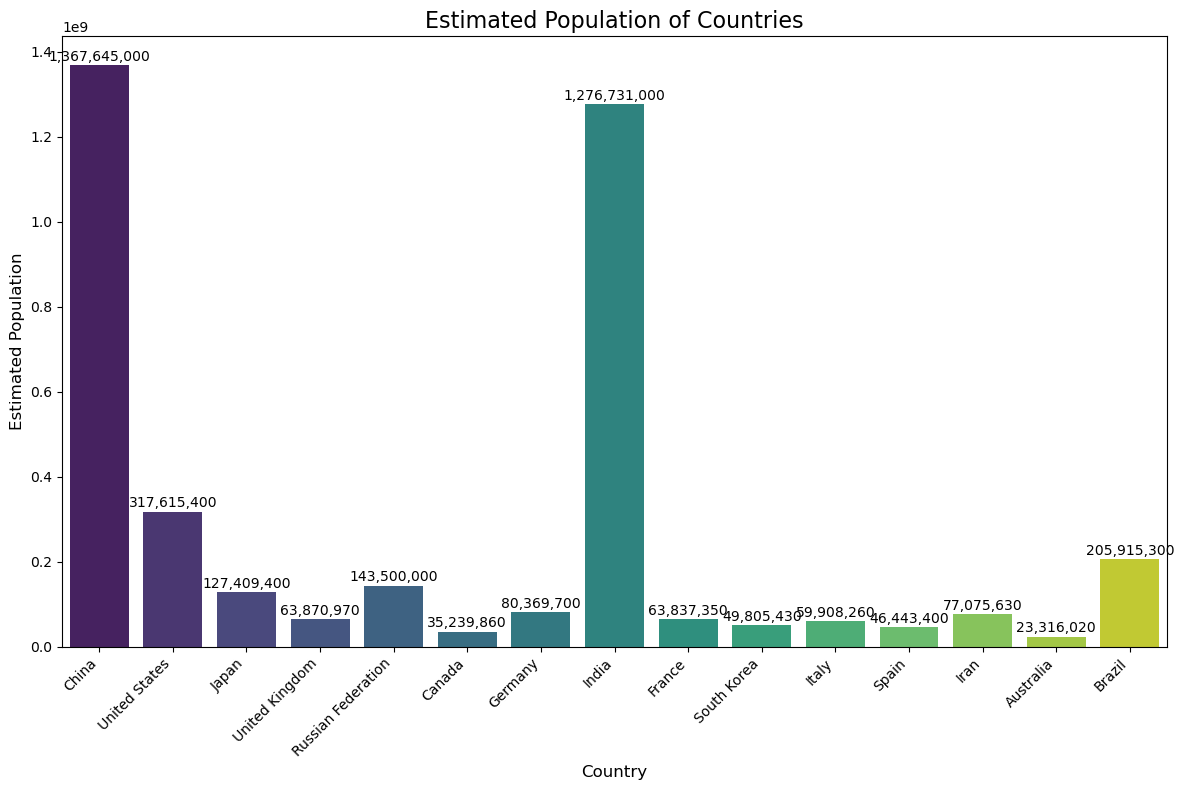

In [359]:
# Create a bar plot
plt.figure(figsize=(12,8))
sns.barplot(x=PopEst.index, y=df['Estimated Population'], palette='viridis')

# Adding labels and title
plt.title('Estimated Population of Countries', fontsize=16)
plt.xlabel('Country', fontsize=12)
plt.ylabel('Estimated Population', fontsize=12)

# Rotate country names for better visibility
plt.xticks(rotation=45, ha="right")

# Show formatted population values as annotations
for i, value in enumerate(df['Estimated Population']):
    plt.text(i, value + 1e7, f"{PopEst[i]}", ha='center', fontsize=10, color='black')

# Show the plot
plt.tight_layout()
plt.show()